# 주제: '모두카페' 운영 상태 파악 및 운영 전략 제시
## 1. 상황 인식
'모두카페'라는 스터디 카페의 매출 추세나 음료와 음식별 판매금액 등의 정보 파악 필요함  
앞으로 '모두카페'가 더 잘되기 위한 운영 전략 제시 필요함
### <데이터> 
1. entry_data: '모두 스터디카페'의 시간별 입장 기록 데이터
2. sales_data: '모두 스터디카페'의 시간별 음식/음료 판매 데이터
3. item_data: '모두 스터디카페'에서 판매하고 있는 음식/음료 종류와 가격
4. item_entry_data: '모두 스터디카페'에서 판매하고 있는 입장권 종류와 가격

## 2. 문제 정의
핵심 문제: 모두카페의 상태는 어떤가?  

<필수문제>  
월별 매출액 추세  
가장 인기있는 음식/음료  
가장 많이 팔린 입장권 종류  

## 3. 데이터 분석

1) 데이터 불러오기

In [210]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [211]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

2) 데이터 확인하기

In [212]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [213]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [214]:
# item_data 데이터 정보 확인하기
item_data.tail()

,구분,분류,상품명,판매금액
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"
173,174,포장,오늘은 한돈고추장불고기,"8,000원"


In [215]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


3) 데이터 분석하기

필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)  
월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.

In [216]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = temp_var['결제일시'].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [217]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',', '')

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = pd.to_numeric(temp_var['결제금액'])

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['결제금액'].groupby(temp_var['date']).count()

In [218]:
payment_data

date
2021-02     18
2021-03    529
2021-04    910
2021-05    658
2021-06    920
2021-07    313
2021-08    293
2021-09    301
2021-10    557
2021-11    679
2021-12    841
2022-01    377
2022-02    282
2022-03    415
2022-04     12
Name: 결제금액, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

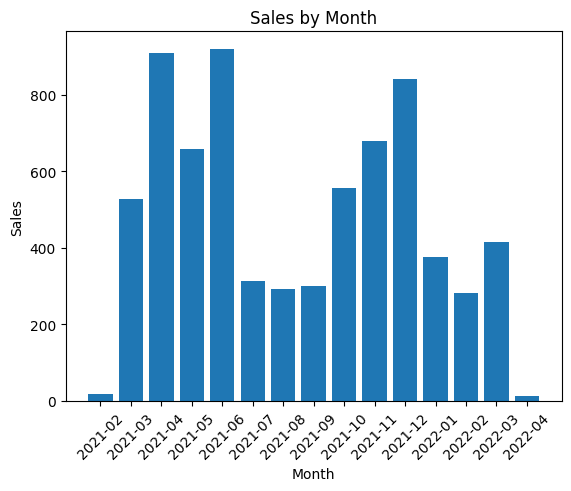

In [219]:
# 집계 결과를 시각화하기
plt.bar(payment_data.index, payment_data)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.show

필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)  
여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

In [220]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
temp_var01 = temp_var[temp_var['판매수량'] !=-1]
temp_var01.reset_index(drop=True)
items_count = temp_var01['상품명'].value_counts()

#집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count)
items_count.sort_values(by=['상품명'], ascending=False)
items_count.reset_index(inplace=True) 
items_count.rename(columns = {'상품명':'집계수량', 'index':'상품명'}, inplace = True)
items_count = items_count.head(10)

In [221]:
items_count

,상품명,집계수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


In [222]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


<function matplotlib.pyplot.show(close=None, block=None)>

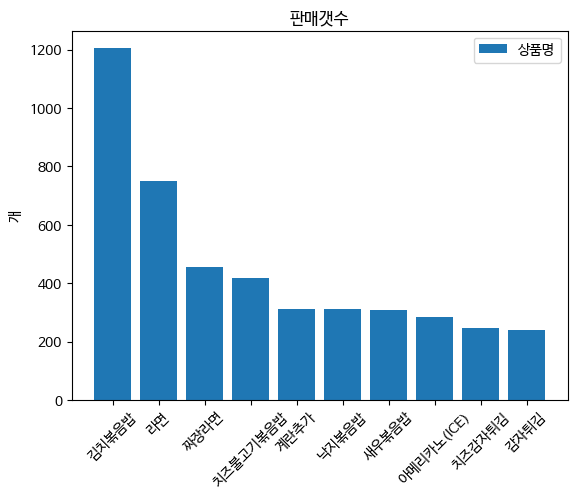

In [223]:
# 집계 결과를 시각화하기
plt.bar(items_count['상품명'], items_count['집계수량'])
plt.title('판매갯수')
plt.ylabel('개')
plt.xticks(rotation = 45)
plt.legend(["상품명"], fontsize=10)
plt.show

In [224]:
#여러 메뉴들의 판매 매출 알아보기
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var01['결제금액'].groupby(temp_var01['상품명']).sum()

#상위 10개 출력하기
items_payment = pd.DataFrame(items_payment)
items_payment = items_payment.sort_values(by=['결제금액'], ascending=False)
items_payment.reset_index(inplace=True)
items_payment = items_payment.head(10)

In [225]:
items_payment

,상품명,결제금액
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


In [226]:
items_payment

,상품명,결제금액
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


<function matplotlib.pyplot.show(close=None, block=None)>

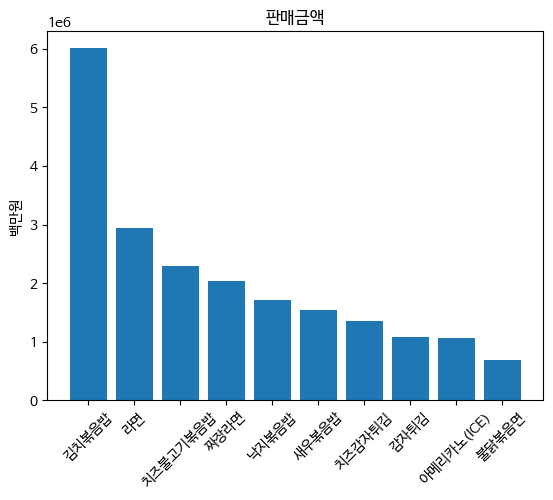

In [227]:
# 집계 결과를 시각화하기
plt.bar(items_payment['상품명'], items_payment['결제금액'])
plt.title('판매금액')
plt.ylabel('백만원')
plt.xticks(rotation = 45)
plt.show

필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)  
여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

In [228]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var03 = entry_data

# temp_var의 금액을 숫자형태로 변환하기
temp_var03['금액'] = pd.to_numeric(temp_var03['금액']) 

# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var03['금액'].groupby(temp_var03['요금제명']).sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = pd.DataFrame(tickets)
tickets = tickets.sort_values(by=['금액'], ascending=False).head(10)
tickets.reset_index(inplace=True)
tickets = tickets.head(10)
tickets

,요금제명,금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


<function matplotlib.pyplot.show(close=None, block=None)>

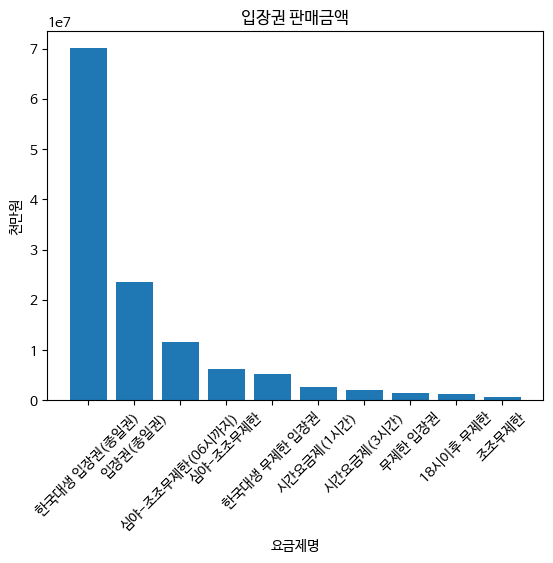

In [229]:
# 집계 결과를 시각화하기
plt.bar(tickets['요금제명'], tickets['금액'])
plt.title('입장권 판매금액')
plt.xlabel('요금제명')
plt.ylabel('천만원')
plt.xticks(rotation = 45)
plt.show

4) 내가 정의한 문제 해결하기  
### 중간 점검: 발견 및 분석
### 발견1: 데이터가 정제되어 있지 않다.

→ -1인것과 1인 것을 세트로 하여 결제건도 없애야함(판매 갯수 집계시 문제발생, 판매금액은 sum을 이용해서 +-상생되므로 괜찮다)

→ 동일 상품에 대해 판매금액이 0원, 1500원, 2000원 등 상이함(2인라면 100원인 것도 있음 → 이벤트성 할인 가격 혹은 가격 변동으로 전제함)

→ 입장권이 종일권, 무제한, 시간제 등으로 나뉘어져 있지 않음

→ 입실시간, 이용시간, 퇴실시간이 완전 같은 결제건이 있음(한사람이 친구꺼까지 결제 가능성으로 전제함)

### 발견2: 스터디 카페인데 커피보다는 음식들이 많이 팔린다.

→ 피시방 음식 데이터를 바탕으로 만든 것 같다 (음식 맛집이어서 보통 스터디 카페랑 다른 것 같다)

→ 이런 점을 이용하여 특별한 스터디 카페로 홍보하기 

### 발견3: 한국대생 입장권이 압도적이다, 두번째는 종일권 입장권이 잘 팔린다.

→ 한국대 앞에 있는 카페이다. 

→ vip고객인 한국대생을 노려서 이벤트를 하자

### 발견4: 매출이 방학시즌에 크게 줄어든다.

→4월 5월 6월 , 10월 11월 12월 기간을 제외한 시즌에 
한국대생 입장권(종일권) 혹은 입장권(종일권) 10퍼센트 할인 이벤트 제안  
혹은 김치볶음밥이나 라면 10퍼센트 할인 이벤트 제안 

### 분석1: 최다 총이용시간 분석하기
→ 가장 많은 시간량에 따른 입장권 조정

### 분석2: 최다 이용 시간대 분석하기  
→ 사람이 몰려서 혹시 자리가 부족하지 않은지 분석하기

### 분석3: 안팔리는 음식/음료/물건/입장권 분석하기
→ 매출에 도움이 되지 않는 items는 버리기, 단순화 전략 필요 (물건 같은 경우는 대여 서비스도 좋을 것 같다)

a. 판매금액이 상이한 결제건 전처리하기  
→ 가격 변동에 따른 매출 변화를 보기 위함 

In [230]:
#전부 처리하기엔 많으므로 가장 잘 팔리는 음식/음료 탑 10개만
print(temp_var01[(temp_var01['결제금액']!= 4000) & (temp_var01['상품명']== '라면')])
idx = temp_var01[(temp_var01['결제금액']!= 4000) & (temp_var01['상품명']== '라면')].index
temp_var01.drop(idx, inplace = True)

                  결제일시 판매위치 상품명  결제방식    비고  판매수량  결제금액              고객  \
837   2022-01-17 10:30  카운터  라면    현금  결제완료     1  1500  customer803878   
1232  2021-12-18 16:31  카운터  라면  신용카드  결제완료     1  2000             NaN   
1600  2021-12-09 09:59  카운터  라면    현금  결제완료     1     0  customer858800   
1992  2021-11-29 10:38  카운터  라면  신용카드  결제완료     1  1500  customer996443   
2075  2021-11-26 10:40  카운터  라면  신용카드  결제완료     1     0  customer896853   
2076  2021-11-26 10:40  카운터  라면  신용카드  결제완료     1  3000  customer896853   
2188  2021-11-22 10:03  카운터  라면  신용카드  결제완료     1     0  customer519056   
2931  2021-10-15 10:36  카운터  라면  신용카드  결제완료     1  2000  customer440840   
4139  2021-06-26 14:46  카운터  라면  신용카드  결제완료     1  1500             NaN   
4269  2021-06-19 10:21  카운터  라면  신용카드  결제완료     1     0             NaN   
4655  2021-06-11 10:04  카운터  라면  신용카드  결제완료     1     0             NaN   
4656  2021-06-11 10:04  카운터  라면  신용카드  결제완료     1  3000             NaN   
4758  2021-06-08 12:38  카

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [231]:
print(temp_var01[(temp_var01['결제금액']!= 5000) & (temp_var01['상품명']== '김치볶음밥')])
idx = temp_var01[(temp_var01['결제금액']!= 5000) & (temp_var01['상품명']== '김치볶음밥')].index
temp_var01.drop(idx, inplace = True)

                  결제일시  판매위치    상품명  결제방식    비고  판매수량  결제금액              고객  \
12    2022-03-31 20:54  선불기1  김치볶음밥  신용카드  결제완료     1  5900  customer264394   
31    2022-03-30 18:15  선불기1  김치볶음밥  신용카드  결제완료     1  5900  customer253742   
38    2022-03-29 18:33  선불기1  김치볶음밥  신용카드  결제완료     1  5900  customer467216   
39    2022-03-29 18:34  선불기1  김치볶음밥  신용카드  결제완료     1  5900  customer983308   
40    2022-03-29 18:35  선불기1  김치볶음밥  신용카드  결제완료     1  5900  customer286156   
...                ...   ...    ...   ...   ...   ...   ...             ...   
5874  2021-04-23 19:23   카운터  김치볶음밥  신용카드  결제완료     1  2500  customer243036   
6263  2021-04-14 19:24   카운터  김치볶음밥  신용카드  결제완료     1  4800             NaN   
6312  2021-04-13 12:26   카운터  김치볶음밥  신용카드  결제완료     1  2500             NaN   
6769  2021-03-19 17:19   카운터  김치볶음밥  신용카드  결제완료     1  2500             NaN   
7011  2021-03-07 11:01   카운터  김치볶음밥  신용카드  결제완료     1  2500             NaN   

         date  
12    2022-03  
31    2022-03  
38 

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [232]:
print(temp_var01[(temp_var01['결제금액']!= 5500) & (temp_var01['상품명']== '치즈불고기덮밥')])
idx = temp_var01[(temp_var01['결제금액']!= 5500) & (temp_var01['상품명']== '치즈불고기덮밥')].index
temp_var01.drop(idx, inplace = True)

Empty DataFrame
Columns: [결제일시, 판매위치, 상품명, 결제방식, 비고, 판매수량, 결제금액, 고객, date]
Index: []


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [233]:
print(temp_var01[(temp_var01['결제금액']!= 4500) & (temp_var01['상품명']== '짜장라면')])
idx = temp_var01[(temp_var01['결제금액']!= 4500) & (temp_var01['상품명']== '짜장라면')].index
temp_var01.drop(idx, inplace = True)

                  결제일시 판매위치   상품명  결제방식    비고  판매수량  결제금액              고객  \
4270  2021-06-19 10:21  카운터  짜장라면  신용카드  결제완료     1  3500             NaN   
6780  2021-03-19 10:40  카운터  짜장라면  신용카드  결제완료     1  2000             NaN   
6781  2021-03-19 10:07  카운터  짜장라면  신용카드  결제완료     1  1500             NaN   
6821  2021-03-17 18:44  카운터  짜장라면  신용카드  결제완료     1  2000  customer552784   

         date  
4270  2021-06  
6780  2021-03  
6781  2021-03  
6821  2021-03  


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [234]:
print(temp_var01[(temp_var01['결제금액']!= 5500) & (temp_var01['상품명']== '낙지볶음밥')])
idx = temp_var01[(temp_var01['결제금액']!= 5500) & (temp_var01['상품명']== '낙지볶음밥')].index
temp_var01.drop(idx, inplace = True)

                  결제일시  판매위치    상품명  결제방식    비고  판매수량  결제금액              고객  \
114   2022-03-25 15:17  선불기1  낙지볶음밥  신용카드  결제완료     1  6400  customer221102   
119   2022-03-24 18:39  선불기1  낙지볶음밥  신용카드  결제완료     1  6400  customer903463   
124   2022-03-24 12:02  선불기2  낙지볶음밥  신용카드  결제완료     1  6400  customer945633   
136   2022-03-23 18:10  선불기1  낙지볶음밥  신용카드  결제완료     1  6400  customer630480   
137   2022-03-23 17:35  선불기1  낙지볶음밥  신용카드  결제완료     1  6400  customer248143   
214   2022-03-16 13:52  선불기1  낙지볶음밥  신용카드  결제완료     1  6400  customer944087   
215   2022-03-16 13:53  선불기1  낙지볶음밥  신용카드  결제완료     1  6400  customer475859   
289   2022-03-10 15:27  선불기1  낙지볶음밥  신용카드  결제완료     1  6400  customer673186   
4492  2021-06-13 11:52   카운터  낙지볶음밥  신용카드  결제완료     1   500             NaN   
5094  2021-05-27 10:18   카운터  낙지볶음밥  신용카드  결제완료     1  3000             NaN   
5316  2021-05-19 10:14   카운터  낙지볶음밥  신용카드  결제완료     1  3000             NaN   
7008  2021-03-07 12:01   카운터  낙지볶음밥  신용카드  결제완료     

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [235]:
print(temp_var01[(temp_var01['결제금액']!= 5000) & (temp_var01['상품명']== '새우볶음밥')])
idx = temp_var01[(temp_var01['결제금액']!= 5000) & (temp_var01['상품명']== '새우볶음밥')].index
temp_var01.drop(idx, inplace = True)

                  결제일시  판매위치    상품명  결제방식    비고  판매수량  결제금액              고객  \
19    2022-03-31 12:00  선불기2  새우볶음밥  신용카드  결제완료     1  5900  customer724529   
101   2022-03-26 14:40  선불기1  새우볶음밥  신용카드  결제완료     1  5900  customer414895   
112   2022-03-25 15:17  선불기1  새우볶음밥  신용카드  결제완료     1  5900  customer221102   
151   2022-03-21 20:57  선불기1  새우볶음밥  신용카드  결제완료     1  5900  customer468591   
193   2022-03-17 18:25  선불기1  새우볶음밥  신용카드  결제완료     1  5900  customer228029   
224   2022-03-16 11:20  선불기1  새우볶음밥  신용카드  결제완료     1  5900  customer995235   
269   2022-03-12 18:55  선불기1  새우볶음밥  신용카드  결제완료     1  5900  customer535623   
2804  2021-10-21 10:41   카운터  새우볶음밥  신용카드  결제완료     1  2500  customer440840   
3484  2021-08-30 14:31   카운터  새우볶음밥  신용카드  결제완료     1  1000             NaN   
5973  2021-04-21 12:54   카운터  새우볶음밥  신용카드  결제완료     1  2500             NaN   
6721  2021-03-22 10:11   카운터  새우볶음밥  신용카드  결제완료     1  2500             NaN   

         date  
19    2022-03  
101   2022-03  
112

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [236]:
print(temp_var01[(temp_var01['결제금액']!= 5500) & (temp_var01['상품명']== '치즈감자튀김')])
idx = temp_var01[(temp_var01['결제금액']!= 5500) & (temp_var01['상품명']== '치즈감자튀김')].index
temp_var01.drop(idx, inplace = True)

                 결제일시  판매위치     상품명  결제방식    비고  판매수량  결제금액              고객  \
67   2022-03-27 17:06  선불기1  치즈감자튀김  신용카드  결제완료     1  5900  customer579767   
172  2022-03-19 15:39  선불기1  치즈감자튀김  신용카드  결제완료     1  5900  customer247773   
270  2022-03-12 18:08  선불기1  치즈감자튀김  신용카드  결제완료     1  5900  customer271523   

        date  
67   2022-03  
172  2022-03  
270  2022-03  


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [237]:
print(temp_var01[(temp_var01['결제금액']!= 4500) & (temp_var01['상품명']== '감자튀김')])
idx = temp_var01[(temp_var01['결제금액']!= 4500) & (temp_var01['상품명']== '감자튀김')].index
temp_var01.drop(idx, inplace = True)

                  결제일시  판매위치   상품명  결제방식    비고  판매수량  결제금액              고객  \
30    2022-03-30 19:30  선불기1  감자튀김  신용카드  결제완료     1  4900  customer390928   
33    2022-03-30 17:37  선불기1  감자튀김  신용카드  결제완료     1  4900  customer390928   
97    2022-03-26 16:52  선불기1  감자튀김  신용카드  결제완료     1  4900  customer530463   
113   2022-03-25 15:17  선불기1  감자튀김  신용카드  결제완료     1  4900  customer221102   
168   2022-03-19 21:38  선불기1  감자튀김  신용카드  결제완료     1  4900  customer914635   
311   2022-03-07 15:58  선불기1  감자튀김  신용카드  결제완료     1  4900  customer254481   
324   2022-03-06 15:29  선불기1  감자튀김  신용카드  결제완료     1  4900  customer730757   
1601  2021-12-09 09:59   카운터  감자튀김    현금  결제완료     1  3500  customer858800   
2450  2021-11-09 21:15   카운터  감자튀김  신용카드  결제완료     1  2000  customer744099   
4198  2021-06-21 21:36   카운터  감자튀김  신용카드  결제완료     1     0             NaN   

         date  
30    2022-03  
33    2022-03  
97    2022-03  
113   2022-03  
168   2022-03  
311   2022-03  
324   2022-03  
1601  2021-12

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [238]:
print(temp_var01[(temp_var01['결제금액']!= 4500) & (temp_var01['상품명']== '아메리카노(ICE)')])
idx = temp_var01[(temp_var01['결제금액']!= 4500) & (temp_var01['상품명']== '아메리카노(ICE)')].index
temp_var01.drop(idx, inplace = True)

                  결제일시  판매위치         상품명  결제방식    비고  판매수량  결제금액  \
21    2022-03-31 11:31  선불기1  아메리카노(ICE)  신용카드  결제완료     1  4400   
27    2022-03-31 10:42  선불기2  아메리카노(ICE)  신용카드  결제완료     1  4400   
68    2022-03-27 17:00  선불기1  아메리카노(ICE)  신용카드  결제완료     1  4400   
69    2022-03-27 17:00  선불기1  아메리카노(ICE)  신용카드  결제완료     1  4400   
90    2022-03-26 20:14  선불기2  아메리카노(ICE)  신용카드  결제완료     1  4400   
...                ...   ...         ...   ...   ...   ...   ...   
7039  2021-03-05 12:57  선불기2  아메리카노(ICE)  신용카드  결제완료     1  4000   
7045  2021-03-04 13:04   카운터  아메리카노(ICE)  신용카드  결제완료     1   500   
7046  2021-03-04 13:04   카운터  아메리카노(ICE)  신용카드  결제완료     1  4000   
7062  2021-03-04 10:05   카운터  아메리카노(ICE)  신용카드  결제완료     1  1000   
7068  2021-03-02 20:11  선불기1  아메리카노(ICE)  신용카드  결제완료     1  4000   

                  고객     date  
21    customer279438  2022-03  
27               NaN  2022-03  
68    customer579767  2022-03  
69    customer579767  2022-03  
90    customer898770  2

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [239]:
print(temp_var01[(temp_var01['결제금액']!= 4500) & (temp_var01['상품명']== '불닭볶음면')])
idx = temp_var01[(temp_var01['결제금액']!= 4500) & (temp_var01['상품명']== '불닭볶음면')].index
temp_var01.drop(idx, inplace = True)

Empty DataFrame
Columns: [결제일시, 판매위치, 상품명, 결제방식, 비고, 판매수량, 결제금액, 고객, date]
Index: []


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<function matplotlib.pyplot.show(close=None, block=None)>

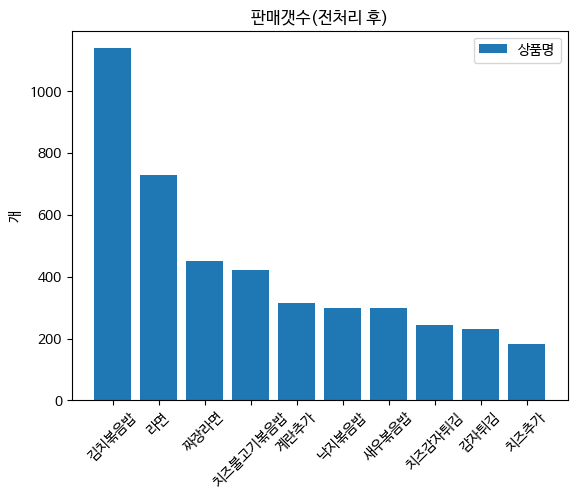

In [240]:
#가장 인기 있는 음식/음료 집계 전처리 후 결과보기
# temp_var의 상품명을 기준으로 집계하기
items_count = temp_var01['상품명'].value_counts()

#집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count)
items_count.sort_values(by=['상품명'], ascending=False)
items_count.reset_index(inplace=True) 
items_count.rename(columns = {'상품명':'집계수량', 'index':'상품명'}, inplace = True)
items_count = items_count.head(10)

# 집계 결과를 시각화하기
plt.bar(items_count['상품명'], items_count['집계수량'])
plt.title('판매갯수(전처리 후)')
plt.ylabel('개')
plt.xticks(rotation = 45)
plt.legend(["상품명"], fontsize=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

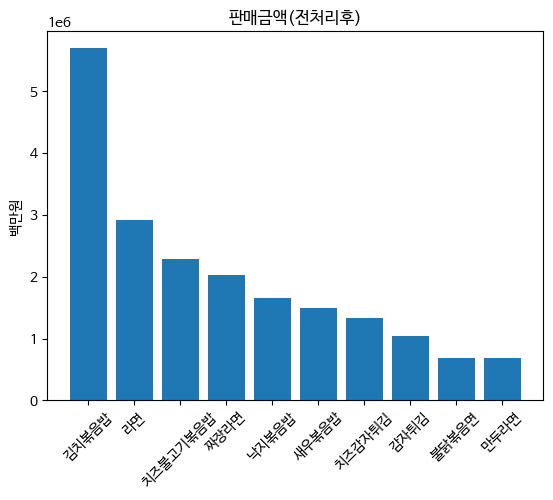

In [241]:
#여러 메뉴들의 판매 매출 전처리 후 결과보기
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var01['결제금액'].groupby(temp_var01['상품명']).sum()

#상위 10개 출력하기
items_payment = pd.DataFrame(items_payment)
items_payment = items_payment.sort_values(by=['결제금액'], ascending=False)
items_payment.reset_index(inplace=True)
items_payment = items_payment.head(10)

# 결제 금액을 시각화하기
plt.bar(items_payment['상품명'], items_payment['결제금액'])
plt.title('판매금액(전처리후)')
plt.ylabel('백만원')
plt.xticks(rotation = 45)
plt.show

→ 전처리 하기 전과 후의 그래프를 비교하였을 때 크게 두드러진 차이는 없지만  
음식/음료 상위 10개 판매 총 매출량이 20,716,600원에서 19,824,600원으로 892,000원줄어든 것을 알 수 있다.  
아래 그래프는 판매 집계와 판매 매출의 전처리 전후 사진이다.

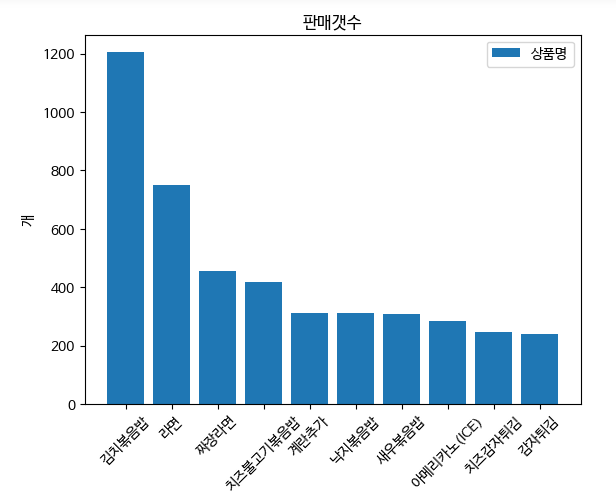
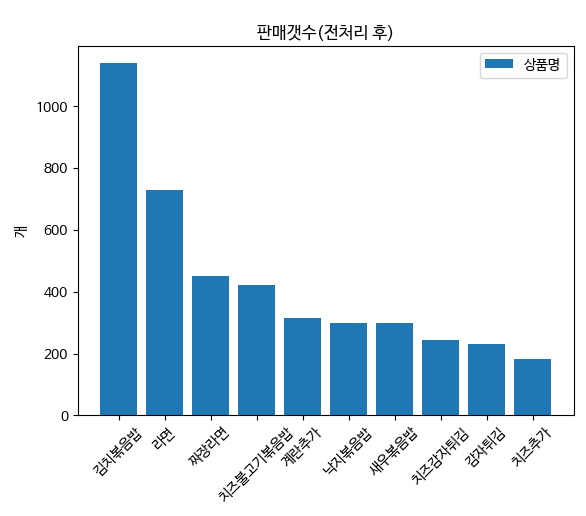
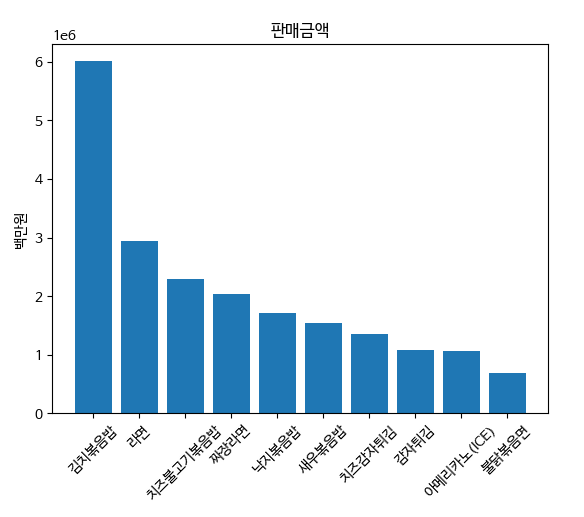
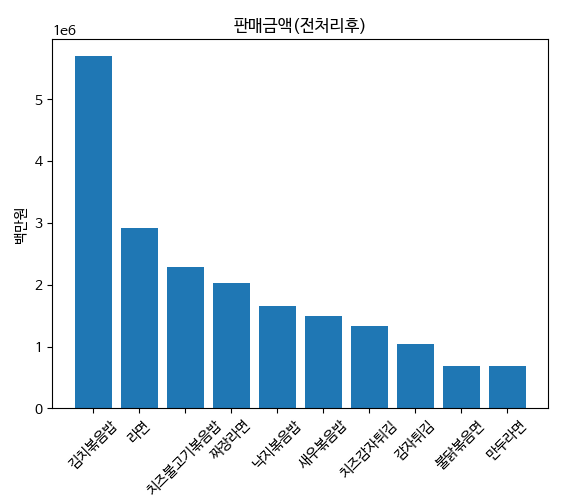

 b. 최다 총 이용시간 분석하기

<function matplotlib.pyplot.show(close=None, block=None)>

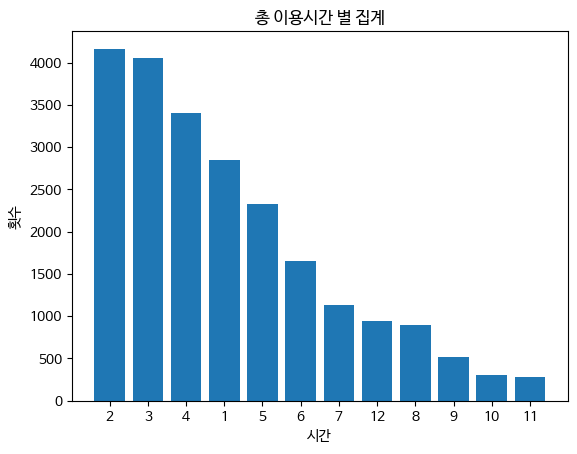

In [242]:
#최다 총 이용시간 분석하기
temp_var04 = entry_data

#시간만 추출하기
temp_var04['이용시간'] = temp_var04['이용'].str[3:5]
use_hour = temp_var04['이용시간'].value_counts()
use_hour = pd.DataFrame(use_hour)
use_hour.sort_values(by=['이용시간'], ascending=False)
use_hour.reset_index(inplace=True)

#데이터 깔끔하게 만들기
use_hour.rename(columns = {'index':'시'}, inplace = True)
use_hour['시'] = use_hour['시'].str.replace(':','')
use_hour


# #집계 결과 시각화
plt.bar(use_hour['시'], use_hour['이용시간'])
plt.title('총 이용시간 별 집계')
plt.xlabel('시간')
plt.ylabel('횟수')
plt.show

# temp_var04['new_Date'] = pd.to_datetime(temp_var04['이용']) datetime을 이용해서 해보고 싶은데 다음에 계에속,,,
# temp_var04['time']=temp_var04['이용'].dt.hour

c. 최다 이용 시간대 분석하기

In [243]:
#입실시간과 퇴실시간을 한시간마다 나누어서 데이터프레임에 저장
temp_var04['입실시간'] = temp_var04['입실'].str[11:13]
temp_var04['퇴실시간'] = temp_var04['퇴실'].str[11:13]
in_time = temp_var04['입실시간'].value_counts() 
out_time = temp_var04['퇴실시간'].value_counts()
in_time = pd.DataFrame(in_time)
out_time = pd.DataFrame(out_time)

In [244]:
#임실 시간을 예쁘게 정리하기
in_time.reset_index(inplace =True)
in_time.rename(columns = {'입실시간':'입실인원', 'index': '입실시간'}, inplace = True)
in_time['입실시간'] = in_time['입실시간'].str.replace(':','')
in_time['입실시간'] = pd.to_numeric(in_time['입실시간'])
in_time = in_time.sort_values(by=['입실시간'], ascending=True)
in_time.reset_index(inplace =True, drop = True)
in_time

,입실시간,입실인원
0,0,526
1,1,293
2,2,239
3,3,77
4,4,58
5,5,98
6,6,144
7,7,131
8,8,242
9,9,472


In [245]:
#퇴실 시간을 예쁘게 정리하기
out_time.reset_index(inplace =True)
out_time.rename(columns = {'퇴실시간':'퇴실인원', 'index': '퇴실시간'}, inplace = True)
out_time['퇴실시간'] = out_time['퇴실시간'].str.replace(':','')
out_time['퇴실시간'] = pd.to_numeric(out_time['퇴실시간'])
out_time = out_time.sort_values(by=['퇴실시간'], ascending=True)
out_time.reset_index(inplace =True, drop = True)
out_time

,퇴실시간,퇴실인원
0,0,1183
1,1,1045
2,2,1054
3,3,801
4,4,683
5,5,1260
6,6,268
7,7,126
8,8,200
9,9,218


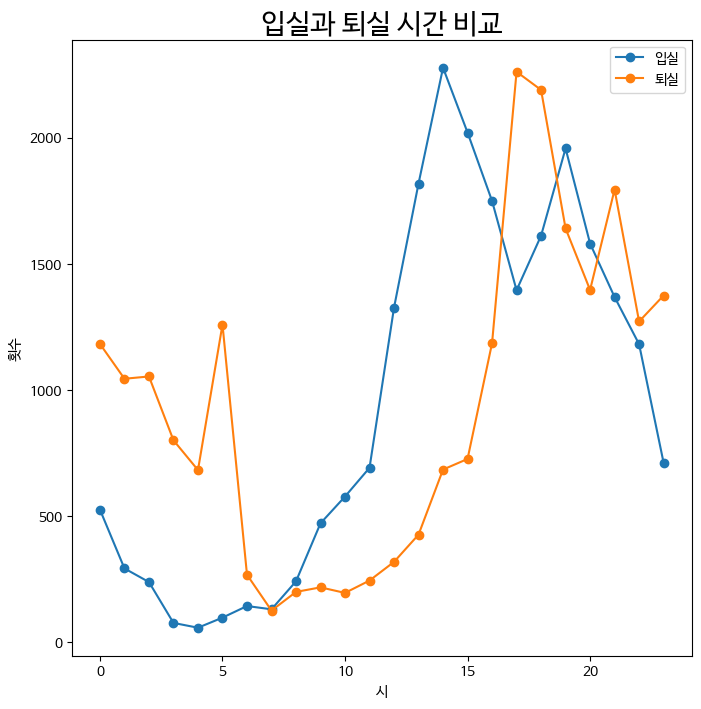

In [246]:
#입실시간과 퇴실시간 시각화
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(in_time['입실시간'],in_time['입실인원'], marker='o',label='입실')
ax.plot(out_time['퇴실시간'], out_time['퇴실인원'], marker='o',label='퇴실') 
ax.legend()
plt.title('입실과 퇴실 시간 비교',fontsize=20)
plt.xlabel('시')
plt.ylabel('횟수')
plt.show()

## 4. 전략 수립 및 실행

### 분석 결과1: 월별 매출액 추세
→ 학기 중인 4월 5월 6월 , 10월 11월 12월 기간에 가장 매출이 높으며  
개학 시즌과 방학 중인 1월 2월 3월, 7월, 8월, 9월 매출이 가장 낮은 것을 알 수 있다.  
이 기간에 더 많은 사람들을 잡기 위해 입장권 할인이나 음식/음료 할인 등의 이벤트를 제안한다.

### 분석 결과2: 가장 인기있는 음식/음료
→ 김치볶음밥, 라면이 가장 인기 있다. 상위 10개 음식/음료에 아메리카노를 제외하고 모두 음식인 점을 보아,  
모두카페에서 끼니를 해결하며 공부하는 사람이 많다는 것을 알 수 있다. 

### 분석 결과3: 가장 많이 팔린 입장권 종류
→ 한국대생 입장권(종일권)과 입장권(종일권)이 압도적으로 가장 많이 팔렸으며
또한 이벤트를 할 때, 한국대생을 대상으로 하면 더욱 좋을 것으로 예상된다. 

### 분석 결과4: 최다 총 이용 시간
→ 2시간, 3시간, 4시간, 1시간 순으로 많이 이용하는 것을 알 수 있다.  
가장 많이 팔린 입장권 종류가 종일권이거나 무제한권인 것에 비해 머무르는 시간이 적은 것을 보아  
시간제 금액 하향 조정이나 혹은 오랫동안 머무르도록 하는 프로모션을 제안한다.
(예를 들면 간단한 물, 커피는 무료 제공, 담요, 충전기 등의 공부할 때 필수 물품들 무료 대여 등)

### 분석 결과5: 입실과 퇴실 시간 비교 
→ 점심시간대인 12시에서 16시 사이에 입실인원이 퇴실인원보다 많으며   
저녁시간대인 16시에서 20시에 급격히 입실인원보다 퇴실 인원이 많아지는 현상이 보인다.  
또한 새벽시간대인 23시에서 6시 사이에 퇴실인원이 많다.   
따라서 16시에서 20시 사이에 입실한 이용자가 퇴실하지 않도록 저녁 시간대에 음식을 할인하는 프로모션 기획을 제안한다. 


## 프로젝트 진행 후기

### 배운점
#### 1. 데이터 확인의 중요성  
데이터를 분석하기에 앞서 원본 데이터를 꼼꼼히 보는 것의 중요성을 깨달았다.  
원본 데이터를 보지 않고 분석을 하려다보니 어떤 문제가 있는 지도 모르고 진행하였으며   
분석이 다 끝날 때쯤에 데이터 전처리의 필요를 뒤늦게 알게 되었다.  
순서에 맞지 않았지만 뒤늦게 데이터 전처리를 하며 더 정확한 분석을 할 수 있게 된 것에 대해 뿌듯했다. 

#### 2 코드
(1) head(), tail(): 60개 최대로 출력된다는 것을 팀원을 통해 알게 되었다.  
(2) plt.xticks(rotation = 45): 이 함수를 통하여 x데이터의 이름이 겹치지 않도록 90도, 45도 등으로 바꿀 수 있음을 팀원을 통해 알았다.  
(3) groupby(): 이 함수에 대해 알고 있었다고 생각했는데 설명을 하려니 제대로 말이 나오지 않았다.  
다른 팀원의 설명을 통해 더욱 정확히 개념을 이해할 수 있었다.  
알고 있다고 착각한 지식에 대해서 반성하게 되었고 이게 토론수업 및 팀별 프로젝트의 장점이라는 것을 깨달았다.  
(4) sort_values(), reset_index(), rename(), to_numeric(), str.replace()함수를 굉장히 많이 쓰면서 익힐 수 있었다.  
순서를 여러가지로 바꿔보면서 데이터프레임이 내가 원하는 방향으로 바뀌는 과정을 더 정확히 알 수 있었고  
앞으로 다양한 데이터를 다룰 때 더욱 수월할 것으로 예상되며 더 많은 방법을 배우고 싶다. 

### 아쉬운점
#### 1. 네 번째 분석으로 VIP 고객의 행동패턴에 따른 새로운 운영 전략 제시를 하면 더 좋을 것 같다. 
#### 2. Matplot방식으로만 분석 한 것 같아서 다음엔 sns방식으로 시각화하는 것도 해보고 싶다. 
#### 3. 좀더 전문성있고 깔끔한 분석과정을 보여주고 싶은데 부족한 것 같다.
#### 4.  결제가 -1인 것과 1인 것을 세트로 묶어서 전처리하기도 하려고 했는데 시간이 부족했다. 다음에 도전하고 싶다.

### 종합 후기
input을 output으로 만들어 내면서 스스로 발전하고 더욱 배울 수 있었다.  
팀원들과 협력하고 토론하며 내가 잡지 못한 포인트를 캐치할 수 있었고  
알고 있다고 착각했던 개념을 다시 공부하며 내 지식으로 만들 수 있었던 좋은 경험이었다.  

지난 시간에 이어 이번에도 발표를 하게 되었는데 떨려서 같은 말을 반복하고 조금 버벅거렸다.  
내용 분석도 중요하지만 듣는 사람이 바로 이해할 수 있도록 발표하는 연습도 해야겠다. 
다른 팀의 발표도 들으면서 발표능력이나 내용분석에 대해서 많이 배울 수 있었다.

또한 어떤 데이터를 분석하는가에 따라 분석 방향이 달라지기 때문에 데이터에 주목하는 것이  
얼마나 중요한지 다시 상기할 수 있었고 앞으로 많은 자료를 참고하여 더욱 전문성있고 완성도 높게 분석하고 싶다. 



# Reference
1. 판다스 조건에 맞는 행 삭제하기
https://blog.naver.com/PostView.naver?blogId=nilsine11202&logNo=221667433984
2. [선 그래프(Line graph)] 3. Matplotlib을 이용하여 여러 개 선 그래프 겹쳐 그리기
https://zephyrus1111.tistory.com/25
3. 오프라인 매장 방문자를 분석하는 그래프 Staying customer by time (시간 당 체류 고객 수)
https://velog.io/@h-go-getter/%EC%98%A4%ED%94%84%EB%9D%BC%EC%9D%B8-%EB%A7%A4%EC%9E%A5-%EB%B0%A9%EB%AC%B8%EC%9E%90%EB%A5%BC-%EB%B6%84%EC%84%9D%ED%95%98%EB%8A%94-%EA%B7%B8%EB%9E%98%ED%94%84-Staying-customer-by-time-%EC%8B%9C%EA%B0%84-%EB%8B%B9-%EC%B2%B4%EB%A5%98-%EA%B3%A0%EA%B0%9D-%EC%88%98
4. DateFrame 데이터 칼럼 이름 바꾸기  
https://rfriend.tistory.com/468
5. 

















